<a href="https://colab.research.google.com/github/pawanme9033/hotel-booking/blob/main/Hotel_Booking_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual

##### **Name       -**   Pawan Kumar Singh 


# **Project Summary -**

1. This project is related to **Hotel Booking Analysis**.
2. In this project we divide EDA in several steps, like 
 1. know your data,
 2. Understanding your Variables
 3. Data Wrangling
 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables
 5. Solution to Business Objective 
 6. Conclusion

2. In this dataset we having two hotel types i.e **City Hotel** and **Resort Hotel**.
2. In this dataset contains total rows  **119390** and **32** columns.
3. As Further moved i.e **know your data**,first step to find different columns which is done by coding Head(),info(), describe(), columns() and some others methods.some of the columns name is hotel,is_canceled,lead_time,arrival_date_year,  arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights.
4. As we further moved we find unique value of each columns and generate a list in tabular form and also check the dataset type of each columns’ find some columns not in accurate data types which corrected it later done  in Data Wrangling part and as well as duplicates data items must be removed as we find duplicates items.The dataset contains **31994** duplicate rows.Unique row - **87396** for that, we are checked the null value of all the columns. After checking, 'company' colume have 93.98% null values. so we drop the column When we are find minimal number of null values, filling thse null values with necesary values as per requirement by using .fillna().Different charts are used for data visualization so that better insights and Business objective is attained.

# **GitHub Link -**

**Github Link:**    https://github.com/Pawanme9034/hotel_booking_EDA/blob/main/Hotel_Booking_Analysis_EDA.ipynb

# **Problem Statement**


1. What is the booking percentage of both type of Hotels?
2. How many booking were cancelled in both type of hotels?
3. Which are the most prefareble channal for hotel booking?
4. which hotel have maximum number of stays?
5. How many number of customers repeated their bookings?
6. Which type of room prefernce given by guest?
7. which are the number of booking by differant market segment?
8. From which country most guests are coming?
9. which hotel have highest ADR?
10. How ADR affect cancelation?
11. which meal type preferred mostly?
12. Which months have most booking rates?
13. How many number of guests required car parking spaces?



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np              # Importing Numpy Libraries
import pandas as pd                  # Importing pandas Libraries
import matplotlib.pyplot as plt       # Importing Matplotib
%matplotlib inline            
from datetime import datetime
import seaborn as sns
import ast 
import plotly.express as px

### Dataset Loading

In [ ]:
# Load Dataset throug github 
database = "https://raw.githubusercontent.com/Pawanme9034/hotel_booking_EDA/main/Hotel%20Bookings.csv?token=GHSAT0AAAAAACBCJTNFXRTKHN4W2NO4ZQP6ZCGFFVA"
hotel_booking_df =pd.read_csv(database)


In [ ]:
#   connecting google drive
# from google.colab import drive
# drive.mount('/content/drive')
#    Load Dataset throug google drive
#    path of .csv filr in google drive is /content/drive/MyDrive/Colab Notebooks/Copy of Hotel Bookings.csv in my case.
# database = "/content/drive/MyDrive/Colab Notebooks/Copy of Hotel Bookings.csv"
# hotel_booking_df =pd.read_csv(database)

### Dataset First View

In [ ]:
# Dataset First Look
pd.set_option('display.max_columns',32)
hotel_booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(hotel_booking_df.index)
print()
print(hotel_booking_df.columns)
print()
# Printing the shape of dataframe
print(f'Shape of DataFrame',hotel_booking_df.shape)

RangeIndex(start=0, stop=119390, step=1)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Shape of DataFrame (119390, 32)


### Dataset Information

In [ ]:
# Dataset Info
hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [ ]:
#Dataset Duplicate Value Count,
# count the number of duplicate rows
duplicate_count =hotel_booking_df.duplicated().sum()

# print the result
print(f'The dataset contains {duplicate_count} duplicate rows.')

#delete duplicate rows.
hotel_booking_df.drop_duplicates(inplace = True)

# total rows = 119390, Duplicate Rows = 31994
uni_num_of_rows = hotel_booking_df.shape[0]

# now printing unique rows = 87396
print(f'Unique row - {uni_num_of_rows}')

The dataset contains 31994 duplicate rows.
Unique row - 87396


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
miss_values=hotel_booking_df.isnull().sum().sort_values(ascending=False)
miss_values

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [ ]:
# we replace all the null value as NaN.
hotel_booking_df.fillna(np.nan, inplace = True)

In [ ]:
# Visualizing for total null values in each column
#to fill the NaN value in the column, let's check which colomns has null value, we have already stored the same.
miss_values[:4]


company     82137
agent       12193
country       452
children        4
dtype: int64

In [ ]:
# Percentage of null values in each column
percentage_null = (100*(hotel_booking_df.isnull().sum()/len(hotel_booking_df.index)).sort_values(ascending=False))
print(percentage_null[:4])

company     93.982562
agent       13.951439
country      0.517186
children     0.004577
dtype: float64


### What did you know about your dataset?

1. In this dataset we having two hotel types i.e City Hotel and Resort Hotel.

2. In this dataset contains total rows 119390 and 32 columns.
3. The dataset contains **31994** duplicate rows.Unique row - **87396**
4. 'company' colume have 93.98% null values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
list(hotel_booking_df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
# Dataset Describe.
hotel_booking_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Variables Description 

1. **hotel :** Types of the hotel (Resort Hotel or City Hotel)

2. **is_canceled :** If the booking was canceled (1) or not (0)

3. **lead_time:** Period between time of booking and checking in (considered in days here).

4. **arrival_date_year :** Year of arrival date

5. **arrival_date_month :** Month of month arrival date

6. **arrival_date_week_number :** Week number in year for arrival date

7. **arrival_date_day_of_month :** Day of arrival date

8. **stays_in_weekend_nights :** Number of weekend nights (Saturday or Sunday) spent at the hotel by the guests.

9. **stays_in_week_nights :** Number of weeknights (Monday to Friday) spent at the hotel by the guests.

10. **adults :** Number of adults among guests

11. **children :** Number of children among guests

12. **babies :** Number of babies among guests

13. **meal :** Type of meal booked

14. **country :** Country of guests

15. **market_segment :** Designation of market segment

16. **distribution_channel :** Name of booking distribution channel

17. **is_repeated_guest :** If the booking was from a repeated guest (1) or not (0)

18. **previous_cancellations :** Number of previous bookings that were cancelled by the customer prior to the current booking

19. **previous_bookings_not_canceled :** Number of previous bookings not cancelled by the customer prior to the current booking

20. **reserved_room_type :** Code of room type reserved

21. **assigned_room_type :** Code of room type assigned

22. **booking_changes :** Number of changes/amendments made to the booking

23. **deposit_type :** Type of the deposit made by the guest

24. **agent :** ID of travel agent who made the booking

25. **company :** ID of the company that made the booking

26. **days_in_waiting_list :** Number of days the booking was in the waiting list

27. **customer_type :** Type of customer, assuming one of four categories

28. **adr :** Average Daily Rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights

29. **required_car_parking_spaces :** Number of car parking spaces required by the customer

30. **total_of_special_requests :** Number of special requests made by the customer

31. **reservation_status :** Reservation status (Canceled, Check-Out or No-Show)

32. **reservation_status_date :** Date at which the last reservation status was updated

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(hotel_booking_df.apply(lambda col: col.unique()))

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

## 3. ***Data Wrangling***



#Data Cleaning



In [ ]:
# 'company' colume have 93.98% null values. so drop the column

hotel_booking_df.drop(['company'], axis=1, inplace=True)


In [ ]:
# there are minimul null values in agent, so replace null from 0 
hotel_booking_df['agent'].fillna(value = 0, inplace = True)
# re-check that column has no null value
hotel_booking_df['agent'].isnull().sum() 

0

In [ ]:
# there are less null values in 'children' colunm, so replace null from 0

hotel_booking_df['children'].fillna(value = 0, inplace = True)
# re-check that column has no null value
hotel_booking_df['children'].isnull().sum() 

0

In [ ]:
# ther are less null values in country colunm, so replace null from 'others' because 'country' colunm dtype is object type.

hotel_booking_df['country'].fillna(value = 'others', inplace = True)

# re-check that column has no null value

hotel_booking_df['country'].isnull().sum() 

0

In [ ]:
#checking whether database having any other null value

hotel_booking_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

### there are no null valus in any colunms

#Changing in datatype for required columns

In [ ]:
#showing the info of the data to check datatype
hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [ ]:
# childer & agent column contanins float values,so change datatype as 'int64'
hotel_booking_df[['children', 'agent']] = hotel_booking_df[['children', 'agent']].astype('int64')

##Addition of new column as per requirement

In [ ]:
#total stay in nights
hotel_booking_df['total_stay_in_nights'] = hotel_booking_df ['stays_in_week_nights'] + hotel_booking_df ['stays_in_weekend_nights']
# creating a column for total stays in nights by adding week night & weekend nights stay column.
hotel_booking_df['total_stay_in_nights'] 

0         0
1         0
2         1
3         1
4         2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Name: total_stay_in_nights, Length: 87396, dtype: int64

In [ ]:
# creating a col for revenue using total stay * adr
hotel_booking_df['revenue'] = hotel_booking_df['total_stay_in_nights'] *hotel_booking_df['adr']
hotel_booking_df['revenue']

0            0.00
1            0.00
2           75.00
3           75.00
4          196.00
           ...   
119385     672.98
119386    1578.01
119387    1103.97
119388     730.80
119389    1360.80
Name: revenue, Length: 87396, dtype: float64

In [ ]:
# Also, for information, we will add a column with total guest coming for each booking
hotel_booking_df['total_guest'] = hotel_booking_df['adults'] + hotel_booking_df['children'] + hotel_booking_df['babies']
hotel_booking_df['total_guest'].sum()

176999

In [ ]:
# in colume 'in_canceled' replace the value from (0,1) to 'Confirme', 'Canceled'and adding new colums 'is_canceled_flot64'
hotel_booking_df['is_canceled_flot64'] = hotel_booking_df['is_canceled'].replace([0,1], ['Confirmed', 'Canceled'])

In [ ]:
# in column 'is_repeated_guest' replacing the value from(0,1) to 'not repeated' and 'repeated'
hotel_booking_df['is_repeated_guest'] = hotel_booking_df['is_repeated_guest'].replace([0,1], ['not repeated', 'repeated'])
hotel_booking_df['is_repeated_guest'].value_counts()

not repeated    83981
repeated         3415
Name: is_repeated_guest, dtype: int64

In [ ]:
#Now, we will check overall revenue hotel wise
hotel_wise_total_revenue = hotel_booking_df.groupby('hotel')['revenue'].sum()
hotel_wise_total_revenue

hotel
City Hotel      18774101.54
Resort Hotel    15686837.77
Name: revenue, dtype: float64

In [ ]:
hotel_booking_df[['hotel', "revenue",'is_canceled_flot64','is_repeated_guest']]

,hotel,revenue,is_canceled_flot64,is_repeated_guest
0,Resort Hotel,0.00,Confirmed,not repeated
1,Resort Hotel,0.00,Confirmed,not repeated
2,Resort Hotel,75.00,Confirmed,not repeated
3,Resort Hotel,75.00,Confirmed,not repeated
4,Resort Hotel,196.00,Confirmed,not repeated
...,...,...,...,...
119385,City Hotel,672.98,Confirmed,not repeated
119386,City Hotel,1578.01,Confirmed,not repeated
119387,City Hotel,1103.97,Confirmed,not repeated
119388,City Hotel,730.80,Confirmed,not repeated


### What all manipulations have you done and insights you found?

**We have done few manipulations in the Data.**

**1. Delete of columns**

a)**company:** this columns has almost 93.98% Null data. so deleting this column will not make any impact in the analysis. 

**2. Removed is_null values & duplicate entries**

a) filling the null values with necesary values as per requirement by using .fillna().
   
    1. there is minimul null values in agent, so we will replace null from 0 
    2. there are less null vlues in 'children' colunm, so replace null from 0
    3. ther are less null vlues in country colunm, so replace null from 'others' because 'country' colunm dtype is object type.

b) there are few rows have duplicate data. So removed those row from data set by using .drop_duplicates() method.



**3.Addition of columns**

a) **Total Guests:** This columns will help to evaluate the volumes of total guest and revenue as well. geting this value by adding total no. of Adults, Children & babies.

b) **Revenue:** find revenue by multiplying adr & total guest. This column will use to analyse the profit and growth of each hotel.

c) **'is_canceled_flot64':** for convating is_canceled datatype values in int64 to flot64.

**4. Replace of Values in columns**

a)**is_repeated_guest:**column 'is_repeated_guest',replace 0,1 from 'Repeated' & 'Not repeated'. Now this values will help to make better understanding while visulization.


**----Changes in data type of values in columns----**

a)**Agent & Children:** these columns contains float values, which is not making any sense in data as this values repreasent the count of guest & ID of agent. So we have changed the data type of these columns from 'float' to 'Integer'.

**In this way, removed unneccesary data & make our data clean and ready to analyse.** 




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Chart - 1

### Q1. What is the booking percentage of both type of Hotels?

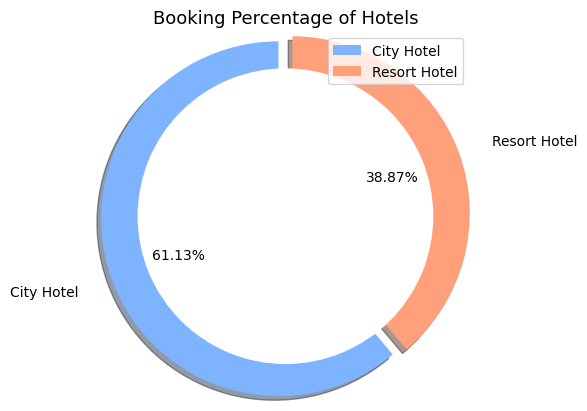

In [ ]:
# Chart - 1 visualization code

# Customizing pie chart
colors = ['#7DB3FF', '#FFA07A'] # Custom colors for pie slices
explode = [0.05, 0.05] # Custom explosion of pie slices
labels = ['City Hotel', 'Resort Hotel'] # Custom labels for pie slices

# Plotting pie chart for hotel booking percentage
plt.pie(hotel_booking_df['hotel'].value_counts(), labels=labels, autopct='%1.2f%%', startangle=90, shadow=True, labeldistance=1.2, explode=explode, radius=1.2, colors=colors)
plt.title('Booking Percentage of Hotels', fontsize=13)
plt.legend(loc=1)
plt.pie([1], colors="w")
plt.show()


##### 1. Why did you pick the specific chart?

pie polt is easy to analyse the parsentage booking of both hotels.

##### 2. What is the insight found from the chart?

total booking in City Hotel is 61.13% and Resort Hotel is 38.87%. so **City hotel** have more consumption.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

city hotel have more guest. need to find solution to attract moer guests for resort hotel like city hotel.The insight that City Hotel has more bookings than Resort Hotel can have a positive impact on business if the hotel management takes appropriate actions based on this information.As for negative growth, there may not be any direct negative impact from this insight. However, if the management neglects the Resort Hotel because it generates less revenue, it may result in a decrease in bookings over time, leading to negative growth in the long run.


# Chart - 2

### Q2. How many booking were cancelled in both type of hotels ?

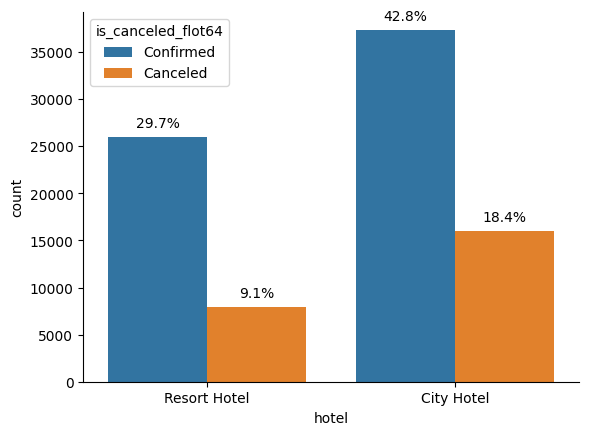

In [ ]:
# Chart - 2 visualization code
# plot a count chart from know booking cancelation
# create countplot with hue
ax = sns.countplot(data=hotel_booking_df, hue='is_canceled_flot64', x='hotel')

# get total number of observations
nobs = len(hotel_booking_df)

# loop over bars
for p in ax.patches:
    # get height and width of bar
    height = p.get_height()
    width = p.get_width()
    # calculate percentage
    percentage = 100 * height / nobs
    # format label as percentage
    label = f'{percentage:.1f}%'
    # add label to bar
    ax.text(x=p.get_x() + width/2, y=height+1000, s=label, ha='center')

# show plot
sns.despine()
plt.show()


##### 1. Why did you pick the specific chart?

in count chat, it is easy to understand cancelation difference between resort hotel and city hotel.

##### 2. What is/are the insight(s) found from the chart?

city hotel have more numbers of guest so confirmation and cancelation both are high.for resort hotel confirm booking is 29.7% and canceled booking is 9.1%for city hotel confirm booking is 42.8% and canceled booking is 18.4%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis of hotel booking data can help create a positive business impact in several ways.

Firstly, by understanding the distribution of booking dates and check-in/check-out dates, hotels can better plan their staffing, inventory, and pricing strategies to optimize their occupancy rates and revenue.

Secondly, by identifying the most popular booking channels, hotels can focus their marketing efforts on those channels and tailor their messaging to reach their target audience.

However, there are also some insights that could lead to negative growth if not addressed properly. For example, the fact that the cancellation rate for city hotels is higher than for resort hotels could indicate that customers have different expectations for these types of hotels, or that there are issues with the booking process or customer service at city hotels. If city hotels do not address these issues, they may see a decline in customer satisfaction and bookings over time.

Overall, the insights gained from the analysis of hotel booking data can have a positive business impact if they are used to inform strategic decisions and improve the customer experience. However, it is important to address any potential negative impacts as well to ensure long-term growth and success.


# Chart - 3

## Q.3. Which are the most preferable channel for hotel booking?

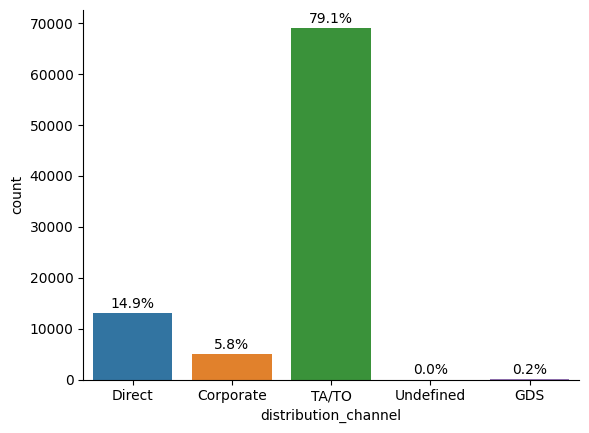

In [ ]:
# Chart - 3 visualization code
# plot a count chart from knowing 'distribution_channel'
# create countplot
ax = sns.countplot(x='distribution_channel', data=hotel_booking_df)

# get total number of observations
nobs = len(hotel_booking_df)

# loop over bars
for p in ax.patches:
    # get height and width of bar
    height = p.get_height()
    width = p.get_width()
    # calculate percentage
    percentage = 100 * height / nobs
    # format label as percentage
    label = f'{percentage:.1f}%'
    # add label to bar
    ax.text(x=p.get_x() + width/2, y=height+1000, s=label, ha='center')

# show plot
sns.despine()
plt.show()


##### 1. Why did you pick the specific chart?

The following chart represent maximum volume of booking done through which channel.

##### 2. What is/are the insight(s) found from the chart?

TA/TO(Tour of Agent & Tour of operator) is most preferable channel for booking. ta/to-79.1%, direct-14.5.8%, corporate - 5.6%, undefined- 0.0% and GDS- 0.2%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that TA/TO is the most preferable channel for hotel bookings can help create a positive business impact, as hotels can focus their marketing efforts and partnerships on these channels to increase their bookings and revenue. They can also tailor their messaging and promotions to appeal to customers who prefer these channels.need to improve 'Direct' channel. Higher the  number of Direct channel will help to increase the revenue generation of Hotel.

Moreover, the insight that direct bookings account for a relatively small percentage of bookings could lead hotels to reconsider their direct booking strategies and invest in marketing campaigns and loyalty programs to incentivize customers to book directly with the hotel.

However, there is a potential negative impact associated with relying heavily on TA/TO for bookings. If the hotel is too dependent on these channels, it may be at risk of losing revenue if the market shifts or if there are disruptions to these channels. Additionally, hotels may have to pay commissions to the agents or operators, which can affect their profitability.

Overall, while the insight that TA/TO is the most preferable channel for bookings can be positive for the hotel, it is important to consider potential negative impacts and to diversify booking channels to minimize risks and maximize revenue.

#Chart - 4

##Q.4. which hotel have maximum number of stays?

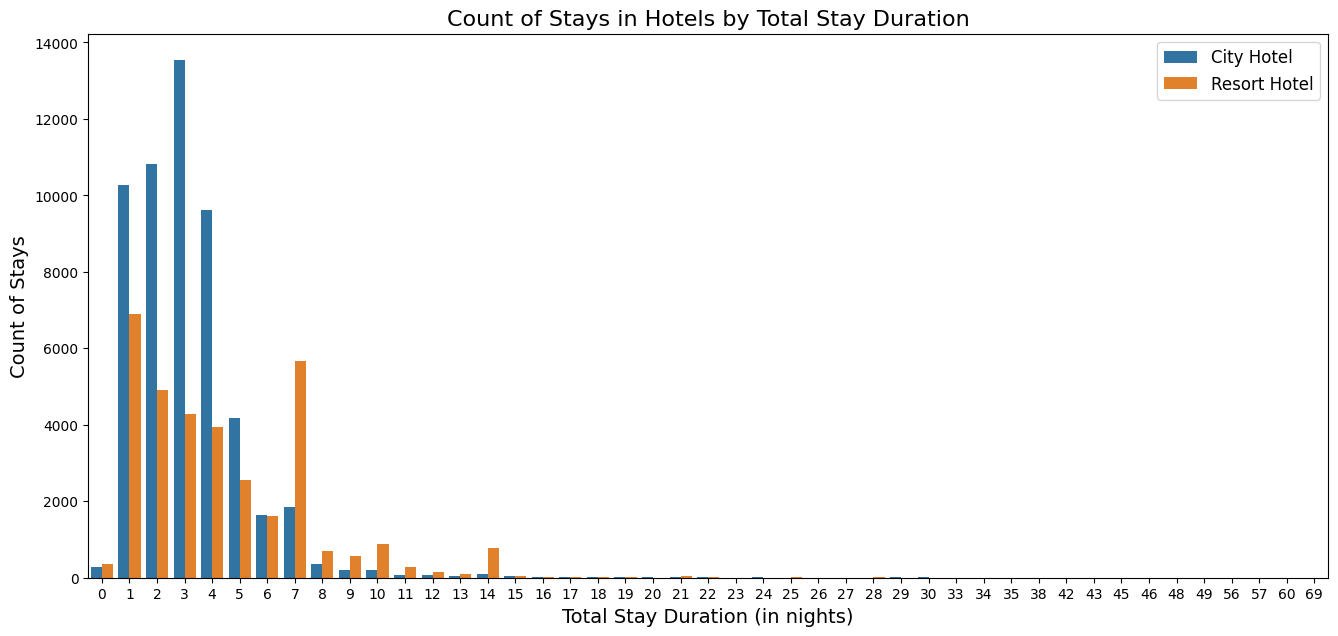

In [ ]:
# Chart - 4 visualization code
# group the total_stay_in_nights and hotel
stay = hotel_booking_df.groupby(['total_stay_in_nights', 'hotel']).agg('count').reset_index()

# select first three columns
stay = stay.iloc[:, :3]

# plot bar chart to show count of stays in hotels by total stay duration
plt.figure(figsize=(16, 8))
sns.barplot(x='total_stay_in_nights', y='is_canceled', hue='hotel', data=stay)

# add chart title and axis labels
plt.title('Count of Stays in Hotels by Total Stay Duration', fontsize=16)
plt.xlabel('Total Stay Duration (in nights)', fontsize=14)
plt.ylabel('Count of Stays', fontsize=14)

# add legend and adjust position
plt.legend(loc='upper right', fontsize=12)
plt.subplots_adjust(bottom=0.2)

# display chart
plt.show()


##### 1. Why did you pick the specific chart?

Bar chats sutable to understande total number of stay and count of stay.


##### 2. What is/are the insight(s) found from the chart?

in this chat. guest mostly like to stay 7 days. in this 7 day they prefer city hotel but if they have plan for more then week they chouse resort hotel

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that guests prefer city hotels for stays of up to 7 days and resort hotels for longer stays can help create a positive business impact for hotels. This information can be used to tailor marketing messages and promotions to appeal to customers based on their length of stay and preferred type of hotel.

However, there are potential negative impacts associated with this insight. If the hotel does not have a good mix of city and resort properties, it may not be able to meet the needs and preferences of all customers. Additionally, if the hotel only focuses on longer stays at their resort properties, they may miss out on potential revenue from shorter stays or business travelers who prefer city hotels.

However, there are potential negative impacts associated with this insight. If the hotel does not have a good mix of city and resort properties, it may not be able to meet the needs and preferences of all customers. Additionally, if the hotel only focuses on longer stays at their resort properties, they may miss out on potential revenue from shorter stays or business travelers who prefer city hotels.


# Chart - 5

##Q.5. How many number of customers repeated their bookings?

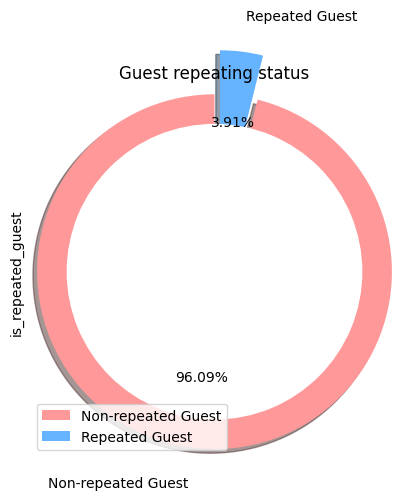

In [ ]:
# chat - 5 visulization code
labels = ['Non-repeated Guest', 'Repeated Guest']
colors = ['#ff9999','#66b3ff']

hotel_booking_df['is_repeated_guest'].value_counts().plot.pie(autopct='%1.2f%%',startangle=90,shadow=True, 
                                                             labeldistance = 1.2, explode = [0,0.3],radius=1.2,
                                                             colors = colors, labels=labels);
plt.legend(loc=3);
plt.title('Guest repeating status');
plt.pie([1],colors="w");


##### 1. Why did you pick the specific chart?

pie chat is easy to understan percentage of repeated and non repeated gueats.

##### 2. What is/are the insight(s) found from the chart?

repeated guest are only 3.91 % and non-repeatad guest are 96.09%

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

hotels have to focus on guest feedback.The insight that only 3.91% of the guests are repeated customers can potentially lead to a negative impact on the business. This indicates that the hotel might be facing challenges in retaining customers, which could be due to various reasons such as poor customer service, lack of loyalty programs, uncompetitive pricing, etc.
However, this insight can also be used to create a positive business impact by identifying the reasons for the low repeat customer rate and addressing them.

# Chart - 6

##Q.6. Which type of room preference given by guest?

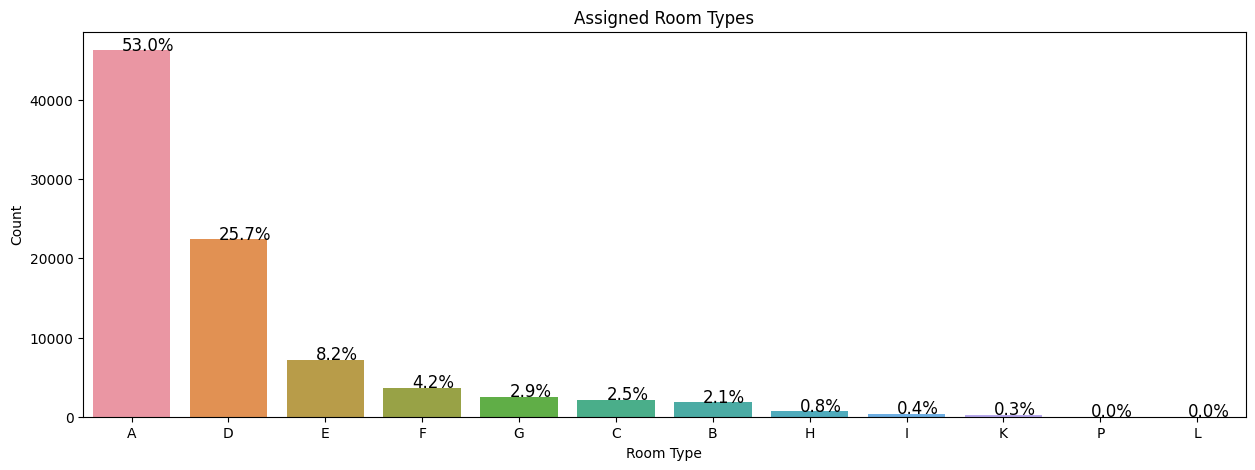

In [ ]:
# chat - 6 visulization code
# Create the countplot
plt.figure(figsize=(15,5))
ax = sns.countplot(x=hotel_booking_df['assigned_room_type'], order=hotel_booking_df['assigned_room_type'].value_counts().index)

# Calculate and display the percentage value for each bar
total = len(hotel_booking_df['assigned_room_type'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.1
    y = p.get_y() + p.get_height() + 20
    ax.annotate(percentage, (x, y), size = 12)

# Add title and axis labels
plt.title('Assigned Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

by count chat it is easy to usderstand which room is alotted.

##### 2. What is/are the insight(s) found from the chart?

This chart shows room type 'A' is most preferred by guest.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact because 'A','D','E' is more prefered by guest due to better services offered in room type.The insight that room type 'A' is the most preferred by guests can help create a positive business impact for the hotel. By knowing which room type is the most popular, the hotel can allocate its resources effectively to meet the demand. The hotel can also consider using this insight to tailor their marketing efforts towards the most popular room type to attract more customers.

However, there could be insights that lead to negative growth. For example, if the hotel only offers a limited number of room types, and room type 'A' is consistently sold out or overbooked, it may lead to disappointed customers who are not able to get the room they wanted. This could lead to negative reviews and a decrease in future bookings. In this case, the hotel may need to consider adding more rooms of the popular room type or promoting other room types to balance the demand and supply of different room types.

# Chart - 7

##Q.7. which are the number of booking by differant market segment?

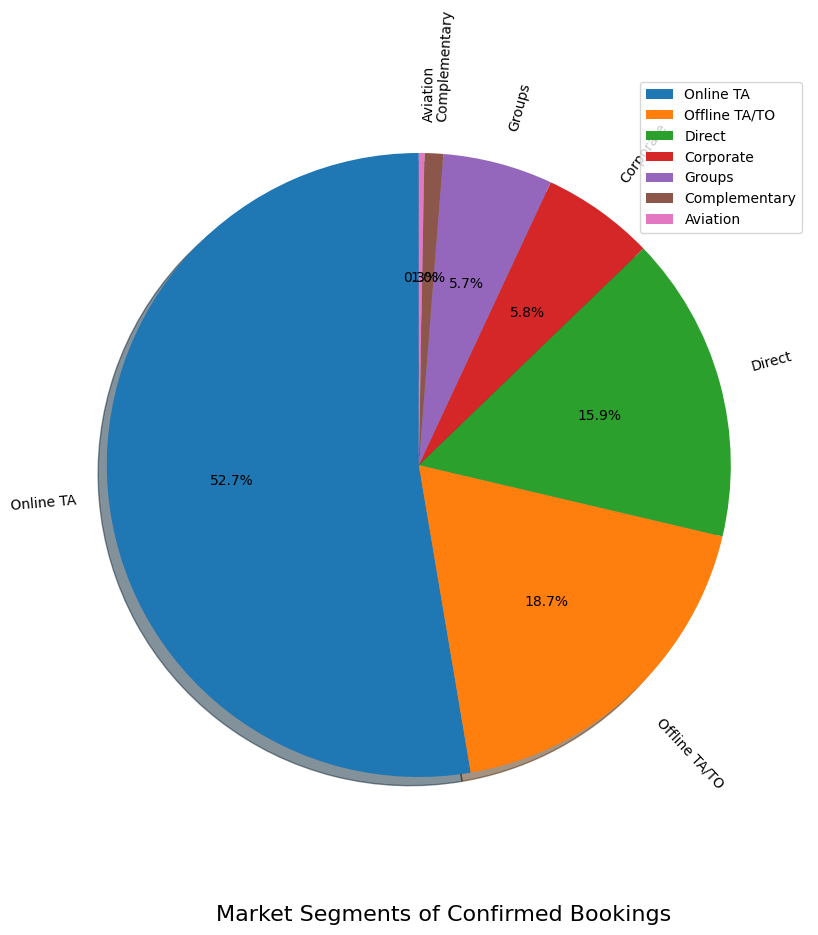

In [ ]:
# Chart - 7 visualization code
not_canceled_data = hotel_booking_df[hotel_booking_df['is_canceled_flot64']=='Confirmed']
segments=not_canceled_data["market_segment"].value_counts()

# pie plot
plt.figure(figsize=(10,10))
plt.pie(segments, labels=segments.index, autopct='%1.1f%%', shadow=True, startangle=90, rotatelabels=True)
plt.legend(segments.index, loc="best")
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.95)
plt.gca().set_aspect('equal', adjustable='box')
plt.suptitle("Market Segments of Confirmed Bookings", fontsize=16, y=0.05)

plt.show()


##### 1. Why did you pick the specific chart?

In pie chart can show clear analysis for  market segment booking percentage

##### 2. What is/are the insight(s) found from the chart?

Online TA is most frequently  used by guests.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it is creating positive business impact that guests are using Online TA market segment as most prefered to book hotels.The insight that the Online TA market segment is most frequently used by guests can help create a positive business impact for the hotel. This insight can inform the hotel's marketing strategy to focus on advertising and promoting their services through Online TA platforms. Additionally, the hotel can work to build a stronger relationship with Online TA partners to maximize the number of guests booking through these channels.

#Chart - 8

## Q.8. From which country most guests are coming?

In [ ]:
# Chart - 8 visualization code
guest_wise = pd.DataFrame(hotel_booking_df[['country', 'total_guest']])
guest_wise_df = guest_wise.groupby(['country'])['total_guest'].sum()
guest_wise_df.sort_values(ascending = False, inplace = True)
# top 10 contry
country_by_guest = guest_wise_df.head(10)
print(country_by_guest)

country
PRT    52144
GBR    21385
FRA    18655
ESP    15681
DEU    10809
ITA     6503
IRL     6235
BRA     4398
BEL     4396
NLD     3906
Name: total_guest, dtype: int64


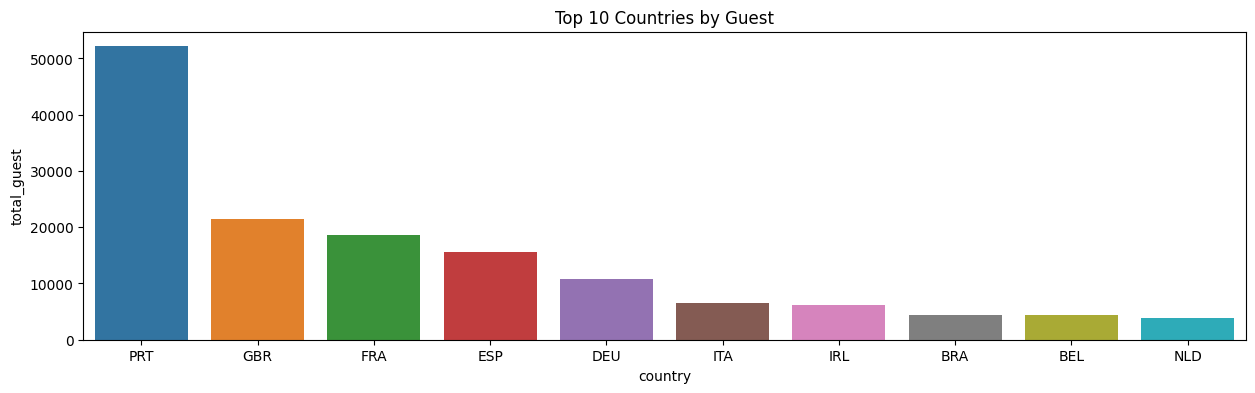

In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(x=country_by_guest.index, y=country_by_guest)
plt.title('Top 10 Countries by Guest')
plt.show()


In [ ]:


# Create dataframe with guest country data
guest_country_wise = hotel_booking_df['country'].value_counts().reset_index()
guest_country_wise = guest_country_wise.reset_index().rename(columns = {'index':'country','country':'number_of_bookings'})
guest_country_wise['percentage'] = (guest_country_wise['number_of_bookings']/guest_country_wise['number_of_bookings'].sum())*100

# Create choropleth map
map_guest = px.choropleth(guest_country_wise, locations='country',
                          color='number_of_bookings',
                          title='HOME COUNTRY OF GUESTS',
                          color_continuous_scale='Greens',
                          projection='natural earth',
                          range_color=(0, max(guest_country_wise['number_of_bookings'])),
                          template='plotly_dark',
                          labels={'number_of_bookings': 'Number of Bookings'}
                         )

# Set background color
map_guest.update_layout(
    plot_bgcolor='rgb(0, 33, 71)',
    paper_bgcolor='rgb(0, 33, 71)'
)

# Show map
map_guest.show()



##### 1. Why did you pick the specific chart?

1.by choropleth plot, from which countey most guests are comming.
2.by bar plot, the top 10 guest country is represented.

##### 2. What is/are the insight(s) found from the chart?

maximum guests are coming from Portugal


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can do more advertising & can provide attractive offers to  Portugal guests to enhance the customer volume.The insight that the maximum guests are coming from Portugal can help create a positive business impact for the hotel. The hotel can use this information to tailor their marketing efforts to attract more guests from Portugal. They could also consider hiring staff who speak Portuguese to better accommodate guests from this market segment.

However, there could be insights that lead to negative growth. If the hotel becomes too reliant on guests from Portugal, they may be vulnerable to changes in the economic or political climate of that country.

Overall, while the insight that the Online TA market segment is most frequently used by guests can provide valuable information to the hotel, it is important to consider the potential negative impacts and take steps to diversify the hotel's distribution channels to avoid over-reliance on any single channel.

#Chart - 9

##Q.9. which hotel have highest ADR?

hotel
City Hotel      110.985944
Resort Hotel     99.025346
Name: adr, dtype: float64


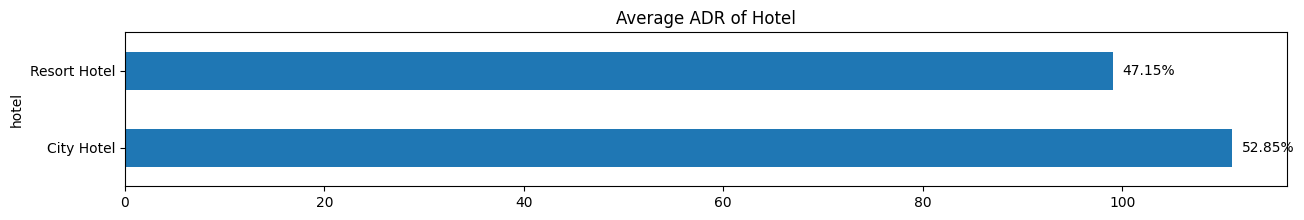

In [ ]:
# chart 9 visualization code
# Group by hotel and ADR.
average_adr = hotel_booking_df.groupby('hotel')['adr'].mean()
print(average_adr)
# Calculate percentage of each hotel's ADR compared to the total ADR.
percentages = 100 * average_adr / sum(average_adr)

# Create a horizontal bar chart with percentage labels.
plt.subplots(figsize=(15, 2))
ax = average_adr.plot(kind='barh')
plt.title("Average ADR of Hotel")

# Add percentage labels to each bar.
for i, v in enumerate(percentages):
    ax.text(average_adr[i] + 1, i, f'{v:.2f}%', color='black', fontsize=10, va='center')


##### 1. Why did you pick the specific chart?

to show the average adr of each hotel type

##### 2. What is/are the insight(s) found from the chart?

average ADR of City hotel-52.85% is higher than Resort hotel-47.15%, so the profit and revenue will be higher for city hotel.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that the average ADR of City hotel is higher than that of Resort hotel suggests that the City hotel is likely to generate more revenue and profit than the Resort hotel. This information could be used by the business to make decisions about where to allocate resources and focus marketing efforts. For example, the City hotel may want to invest more in advertising and promotions to attract more customers and increase its revenue.

However, it's important to note that this insight alone may not be enough to guarantee a positive business impact. Other factors such as occupancy rates, marketing strategies, and customer satisfaction also play a significant role in determining the success of a hotel business.

Regarding negative growth, there may be insights that lead to negative growth if they indicate that the business is performing poorly or facing significant challenges. For example, if a hotel has low customer satisfaction scores or high employee turnover rates, these could be indicators of underlying problems that could lead to negative growth in the future. It's important to carefully consider all insights and take action to address any potential issues before they impact the business.

# Chart - 10

##Q.10. How ADR affect cancelation?

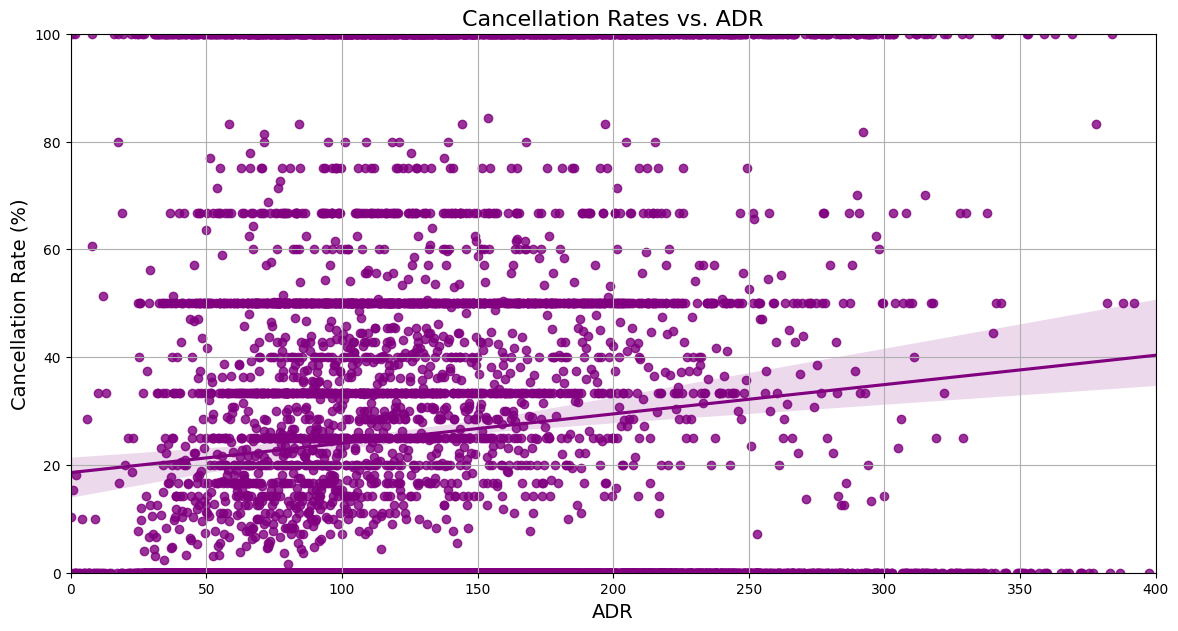

In [ ]:
# chart 10 visualization code
# calculate cancellation rates for each ADR value
adr_cancel_data = hotel_booking_df.groupby("adr")['is_canceled'].describe()

# create a scatter plot with regression line
plt.figure(figsize=(14,7))
sns.regplot(x=adr_cancel_data.index, y=adr_cancel_data["mean"].values * 100, color='purple')

# set title and labels
plt.title("Cancellation Rates vs. ADR", fontsize=16)
plt.xlabel("ADR", fontsize=14)
plt.ylabel("Cancellation Rate (%)", fontsize=14)

# set axis limits
plt.xlim(0,400)
plt.ylim(0,100)

# display grid
plt.grid()

plt.show()


##### 1. Why did you pick the specific chart?

To show how ADR affect cancelation

##### 2. What is/are the insight(s) found from the chart?

The correlation between ADR and cancellations is positive which means as ADR increases number of booking cancellations will also be increases.

The insights gained from the correlation between ADR and cancellations can help create a positive business impact if used appropriately. For example, if the analysis reveals that high ADRs are associated with high cancellation rates, a hotel manager could take steps to reduce cancellations, such as improving the hotel's cancellation policies, offering more attractive packages or deals, or improving the customer service experience to increase customer satisfaction and loyalty.

Moreover, if the insights gained from the analysis reveal a strong negative correlation between ADR and cancellations, this may lead to negative growth as well. In this case, if the hotel management decides to decrease the ADRs of the rooms to reduce cancellations, it may result in decreased revenue and profits in the long term, which could have a negative impact on the business.

Therefore, it is important to carefully consider the insights gained from the analysis and make informed decisions based on the data to create a positive business impact.

# Chart - 11

##Q. 11. which meal type preferred mostly?

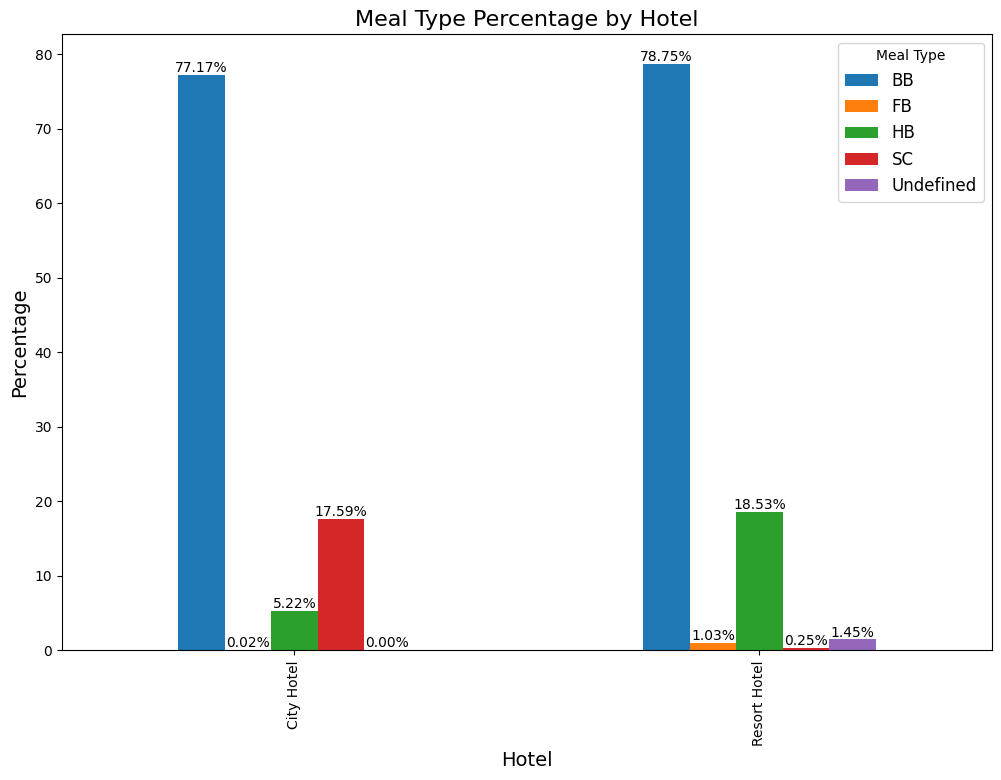

In [ ]:
import matplotlib.pyplot as plt

# Group data by hotel and meal
hotel_meal = hotel_booking_df.groupby(['hotel', 'meal'])['meal'].count().unstack()

# Calculate percentage
hotel_meal_percent = hotel_meal.apply(lambda x: round(x/x.sum()*100, 2), axis=1)

# Create bar chart
ax = hotel_meal_percent.plot(kind='bar', figsize=(12, 8))

# Add labels and legend
ax.set_xlabel('Hotel', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Meal Type Percentage by Hotel', fontsize=16)
ax.legend(title='Meal Type', fontsize=12)

# Add percentage values to the bars
for c in ax.containers:
    ax.bar_label(c, label_type='edge', fontsize=10, labels=[f'{x:.2f}%' for x in c.datavalues])

# Show the chart
plt.show()


##### 1. Why did you pick the specific chart?

bar chart To show the meal preferance of the guest hotel-wise.

##### 2. What is/are the insight(s) found from the chart?

BB (Bed & breakfast) meal is most preferred by guests in both the hotels.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

So Hotel can give more delisious and variety of dishes in this meal to get customer repeat & attaract new customer. and focus HB and SC also.The insight that BB meal is the most preferred by guests can have a positive impact on the business, allowing the hotel to focus on providing a better experience for guests who choose this meal option. However, insights showing less popular meal options may lead to negative consequences, such as a loss of revenue, if changes are made. Therefore, it is important to consider the overall business strategy before making significant changes.

# Chart-12

### Q.12. Which months have most booking rates?

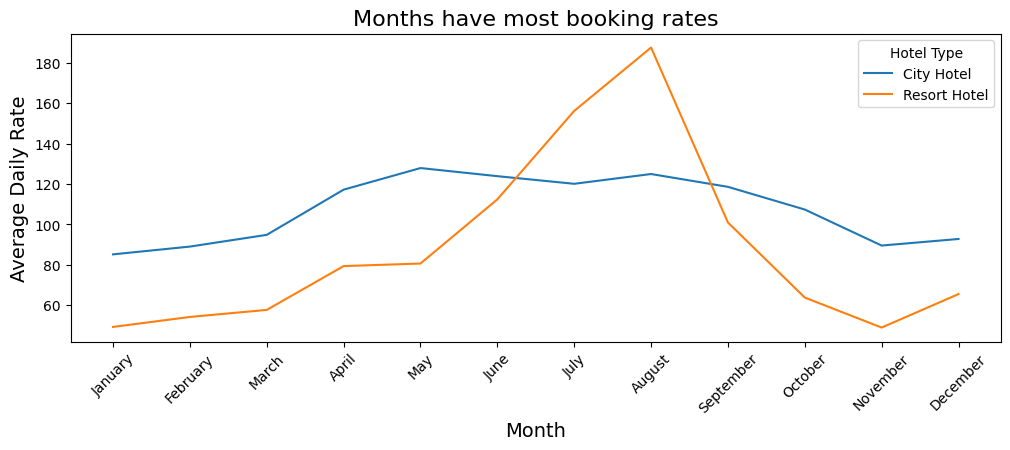

In [ ]:
# Chart - 12 visualization code
hb_df= hotel_booking_df.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()
month=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
hb_df['arrival_date_month']=pd.Categorical(hb_df['arrival_date_month'],categories=month ,ordered=True)
hb_df=hb_df.sort_values('arrival_date_month')

plt.figure(figsize=(12,4))
sns.lineplot(x=hb_df['arrival_date_month'], y=hb_df['adr'], hue=hb_df['hotel'])

# set title and labels
plt.title("Months have most booking rates", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Daily Rate", fontsize=14)

# set x-axis ticks
plt.xticks(rotation=45)

# display legend
plt.legend(title="Hotel Type")

plt.show()


##### 1. Why did you pick the specific chart?

line chart provied clear insights of adr of city hotel and resort hotel across each month.

##### 2. What is/are the insight(s) found from the chart?

may to august highest booking in resort hotel.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above chart shows month May, July and Aug are the highest booking months due to holiday season. Recommending aggressive advertisement to lure more customers.

The insight that the highest bookings in the resort hotel occur during the months of May to August could potentially have a positive impact on the business. The hotel management can use this information to create targeted marketing campaigns and promotional offers during these months to attract more guests and increase revenue.

On the other hand, if there is a sudden decrease in bookings during these months, it could have a negative impact on the business. The hotel management should investigate the reasons behind the decrease in bookings and take necessary steps to address the issue, such as improving the quality of services, offering better deals or discounts, or improving marketing strategies to attract more guests.

# Chart -13

###Q.13. How many number of guests required car parking spaces?

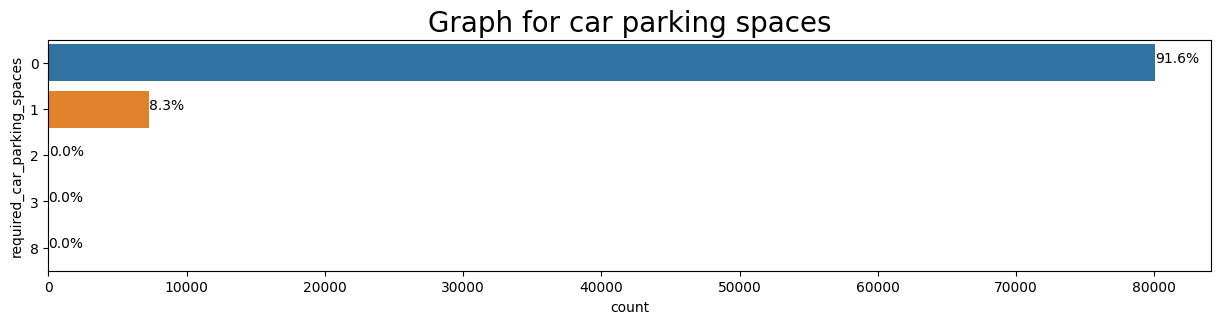

In [ ]:
# Chart - 13 visualization code
# Countplot of number of guests required car pariking spaces
plt.figure(figsize=(15, 3))
ax = sns.countplot(data=hotel_booking_df, y='required_car_parking_spaces')
ax.set_title('Graph for car parking spaces', fontsize=20)

# Add percentage labels to the bars
total = len(hotel_booking_df['required_car_parking_spaces'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

plt.show()


##### 1. Why did you pick the specific chart?

count chart shoe that very less number of guests required paring space.

##### 2. What is the insight found from the chart?

very less number of guest required parking spaces.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

insight help the hotel to provide better service.very less number of guest required parking spaces.only one cae parking required for guest.

The insight that a very less number of guests require parking spaces may not necessarily have a direct positive or negative impact on business growth. However, it can still be useful for hotel management to optimize their parking space utilization and potentially reduce costs associated with maintaining unused parking spaces. On the other hand, if a hotel is experiencing high demand for parking spaces but does not have enough available, this could lead to a negative impact on customer satisfaction and potentially result in lost business.

# Chart - 14 - Correlation Heatmap

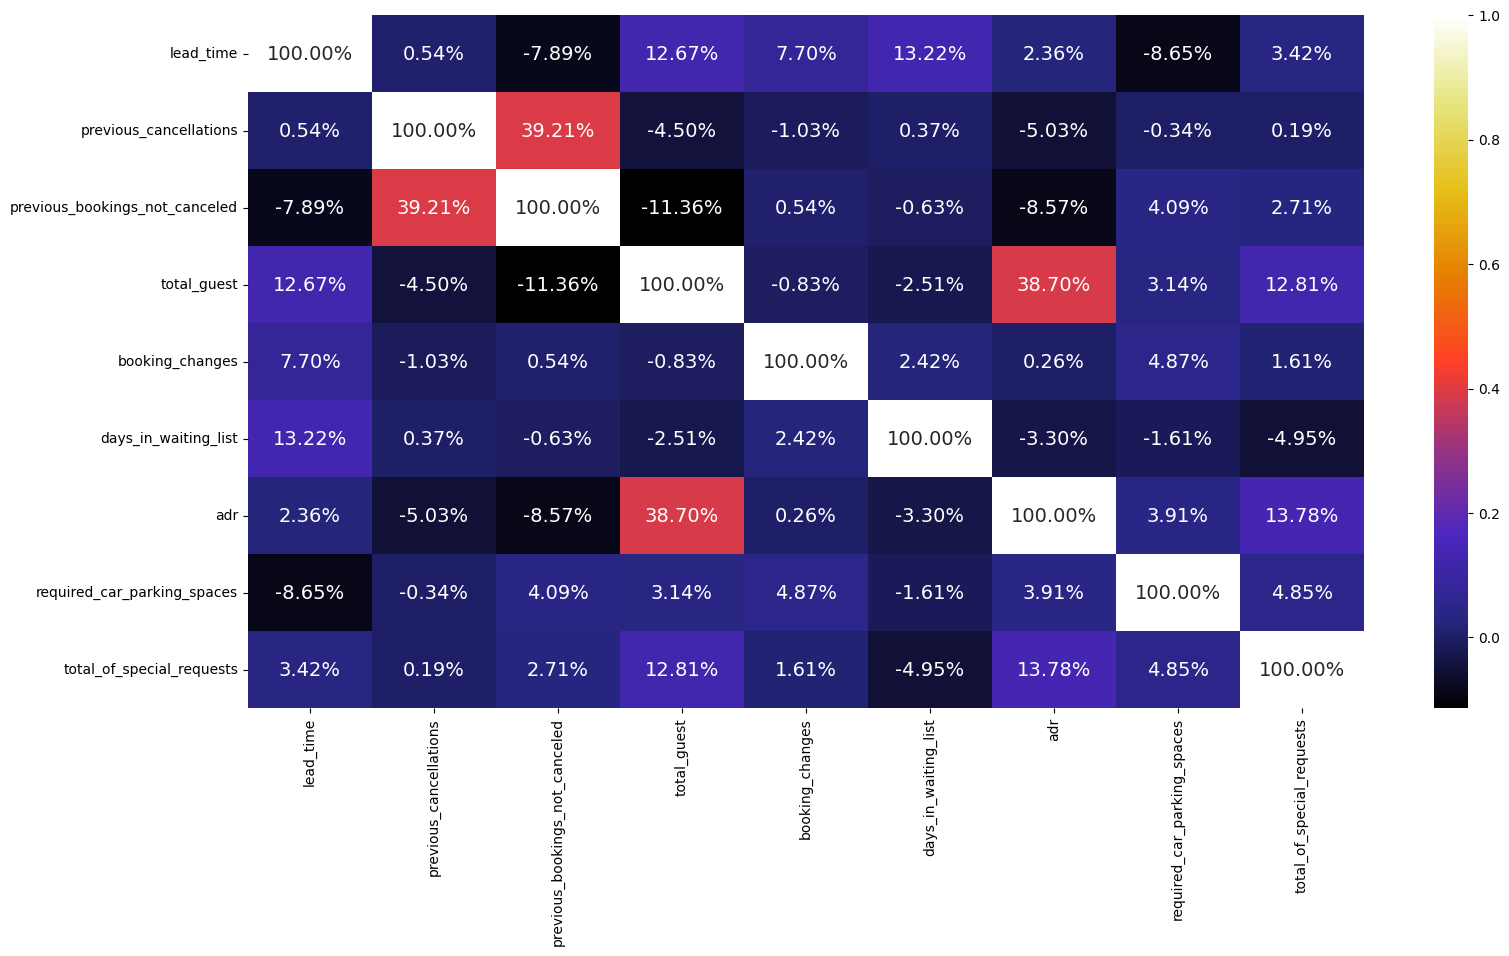

In [ ]:
# Chart - 14 visualization code
# Correlation heatmap
corr_df = hotel_booking_df[['lead_time','previous_cancellations', 'previous_bookings_not_canceled', 'total_guest','booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']].corr()
plt.figure(figsize=(18,9))
sns.heatmap(corr_df, cmap='CMRmap', annot=True, fmt='.2%', annot_kws={"fontsize":14})
plt.show()


##### 1. Why did you pick the specific chart?

To understand the relationsip between different numerical values

##### 2. What is/are the insight(s) found from the chart?

Highest correlation value between axis is 39.21% positive & lowest correlation value between the axis is -11.36% negative.total guest and adr is highly correlated
total guest  and previous booking not canceled is negative correlation
previous booking not canceled and previous cancellation positive correlated. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can potentially help create a positive business impact. Let's break it down:

Total guest and ADR (Average Daily Rate) being highly correlated means that as the total number of guests increases, the ADR also tends to increase. This can indicate that the business is able to attract a higher number of guests at a higher rate, which can lead to increased revenue and profitability.

Total guest and previous booking not canceled having a negative correlation means that as the total number of guests increases, the number of previous bookings that were not canceled tends to decrease. This may indicate that there could be cancellations or no-shows from previous bookings, which can impact revenue and result in lost business opportunities. This insight can help the business identify areas for improvement in managing bookings and reducing cancellations, which could lead to increased revenue.

Previous booking not canceled and previous cancellation being positively correlated means that as the number of previous bookings that were not canceled increases, the number of previous cancellations also tends to increase. This may indicate that the business has a higher rate of cancellations despite bookings not being canceled. This insight can help the business identify potential issues with their cancellation policies, customer service, or booking management processes, and take corrective actions to reduce cancellations and improve guest retention.

However, it's important to note that correlation does not necessarily imply causation. These insights provide valuable information for identifying patterns and trends, but further analysis and investigation would be needed to establish causality and understand the underlying reasons behind the correlations.

Insights that could lead to negative growth would be those that highlight areas of concern or weaknesses in the business processes or operations.

# Chart-15 Pair plot

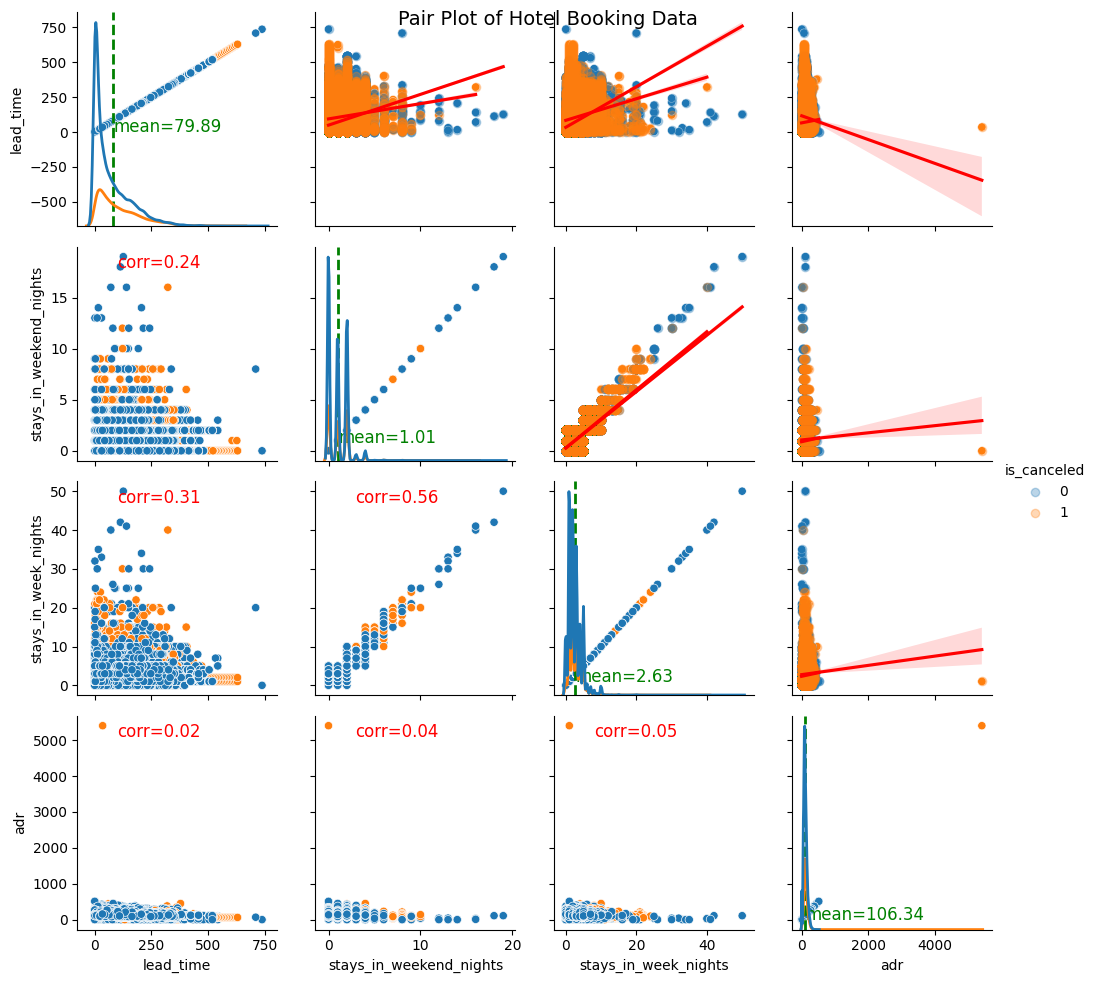

In [ ]:
# Chart - 15 visualization code

# selecting the variable for pair plot are 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', and 'adr'.
vars_to_plot = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adr']

# create a PairGrid
g = sns.PairGrid(hotel_booking_df, vars=vars_to_plot, hue='is_canceled', diag_sharey=False)

# plot the scatter plots
g.map(sns.scatterplot)

# plot the diagonal KDE plots with mean values
g.map_diag(sns.kdeplot, lw=2)
for i, var in enumerate(vars_to_plot):
    mean_val = hotel_booking_df[var].mean()
    g.axes[i, i].axvline(mean_val, lw=2, ls='--', color='green')
    g.axes[i, i].text(mean_val*1.05, 0.8, f"mean={mean_val:.2f}", transform=g.axes[i, i].transData, color='green', fontsize=12)

# plot the correlation coefficients
g.map_upper(sns.regplot, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
for i in range(len(vars_to_plot)):
    for j in range(i+1, len(vars_to_plot)):
        corr_coef = hotel_booking_df[[vars_to_plot[i], vars_to_plot[j]]].corr().iloc[0, 1]
        g.axes[j, i].text(0.2, 0.9, f"corr={corr_coef:.2f}", transform=g.axes[j, i].transAxes, color='red', fontsize=12)

# set the title and legend
g.fig.suptitle('Pair Plot of Hotel Booking Data', fontsize=14)
g.add_legend()

# show the plot
plt.show()


##### 1. Why did you pick the specific chart?

The pairplot chart is a good choice to visualize the pairwise relationships between multiple variables in a dataset. This chart shows scatter plots for each combination of variables along the diagonal, and kernel density estimates for each variable on the diagonal, making it easy to visualize both the distribution of each variable and the relationships between them.

##### 2. What is the insight found from the chart?


Based on the dataset, the following insights can be obtained from a pair plot:

'lead_time' vs 'stays_in_weekend_nights': The pair plot can show if there is any relationship between the lead time (number of days between booking date and arrival date) and the number of weekend nights stayed by the guests. It can help identify if there is any seasonality or trend in bookings made in advance and weekend stays.

'lead_time' vs 'stays_in_week_nights': The pair plot can show if there is any relationship between the lead time and the number of weekday nights stayed by the guests. It can help identify if there is any seasonality or trend in bookings made in advance and weekday stays.

'lead_time' vs 'adr' (average daily rate): The pair plot can show if there is any relationship between the lead time and the average daily rate. It can help identify if guests booking in advance tend to get different rates compared to last-minute bookings.

'stays_in_weekend_nights' vs 'adr': The pair plot can show if there is any relationship between the number of weekend nights stayed and the average daily rate. It can help identify if there are any trends in pricing for weekend stays.

'stays_in_week_nights' vs 'adr': The pair plot can show if there is any relationship between the number of weekday nights stayed and the average daily rate. It can help identify if there are any trends in pricing for weekday stays.

'stays_in_weekend_nights' vs 'stays_in_week_nights': The pair plot can show if there is any relationship between the number of weekend nights stayed and the number of weekday nights stayed. It can help identify if guests tend to stay for more weekend nights compared to weekday nights, or vice versa.

'adr' vs 'is_canceled': The pair plot can show if there is any relationship between the average daily rate and the cancellation status of the bookings. It can help identify if there are any differences in pricing for canceled and non-canceled bookings.

'stays_in_weekend_nights' vs 'is_canceled': The pair plot can show if there is any relationship between the number of weekend nights stayed and the cancellation status of the bookings. It can help identify if there are any differences in cancellation rates for weekend stays compared to weekday stays.

'stays_in_week_nights' vs 'is_canceled': The pair plot can show if there is any relationship between the number of weekday nights stayed and the cancellation status of the bookings. It can help identify if there are any differences in cancellation rates for weekday stays compared to weekend stays.

'lead_time' vs 'is_canceled': The pair plot can show if there is any relationship between the lead time and the cancellation status of the bookings. It can help identify if bookings made in advance have different cancellation rates compared to last-minute bookings.

These are some of the insights that can be obtained from a pair plot using the variables provided in the dataset. However, the actual insights may vary depending on the data and the specific characteristics of the dataset. It is important to analyze the pair plot in conjunction with other exploratory data analysis (EDA) techniques and statistical analysis to gain a comprehensive understanding of the data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from data analytics can certainly help create a positive business impact. Data analytics can provide valuable information and insights that can be used to make informed decisions, optimize processes, identify new opportunities, improve customer experiences, and drive overall business performance. By leveraging data analytics effectively, businesses can gain a competitive advantage and achieve positive outcomes, such as increased revenue, improved profitability, enhanced operational efficiency, and better customer satisfaction.

However, it's important to note that not all insights derived from data analytics will necessarily lead to positive business outcomes. There are certain scenarios where insights may result in negative growth or unfavorable outcomes. For example:

Identifying Ineffective Strategies: Data analytics may reveal that certain business strategies or initiatives are not yielding the desired results or are not aligned with market trends or customer preferences. This could lead to negative growth if corrective actions are not taken to address the issues identified.

Uncovering Operational Inefficiencies: Data analytics may uncover operational inefficiencies or bottlenecks that are impacting productivity or increasing costs. Addressing these inefficiencies may require investments in process improvements, technology upgrades, or other changes, which could initially impact the bottom line before generating positive returns.

Identifying Customer Dissatisfaction: Data analytics may reveal patterns of customer dissatisfaction, such as poor product performance, negative feedback, or declining customer retention rates. If these issues are not addressed promptly, they may result in negative growth, as dissatisfied customers may switch to competitors or share their negative experiences with others, leading to reputational damage.

Unforeseen Market Changes: Data analytics may uncover unforeseen changes in market dynamics, such as shifting consumer preferences, competitive pressures, regulatory changes, or other external factors that may impact business performance. If not addressed appropriately, these changes may result in negative growth or even business disruption.

In summary, while data analytics can provide valuable insights to drive positive business outcomes, it's important to carefully evaluate and act upon the insights to avoid any potential negative impacts. Timely actions, appropriate strategies, and effective execution are crucial to ensure that insights gained from data analytics lead to positive business impacts.

## **5. Solution to Business Objective**

**Business objective attained as follows:** 

1. Inventory Management and Cancellation Policies:
* Implement robust inventory management practices to ensure optimal allocation of rooms and minimize overbooking.
* Review and refine cancellation policies to minimize cancellations and revenue loss, while also considering guest satisfaction.
* Utilize data analytics to forecast demand, identify booking patterns, and adjust inventory accordingly.
2. Booking Channel Optimization:
* Strengthen partnerships with travel agencies and tour operators to optimize the TA/TO booking channel, which is the most preferred by guests.
* Invest in direct booking strategies to increase direct bookings and reduce reliance on third-party channels.
* Enhance the online booking experience, including user-friendly interfaces, seamless payment options, and personalized offers to attract more direct bookings.
3. Guest Loyalty and Relationship Management:
* Develop and implement guest loyalty programs to incentivize repeat bookings and foster guest loyalty.
* Utilize guest data to personalize offerings, tailor promotions, and enhance guest experiences to drive repeat bookings.
* Monitor and manage online reviews and ratings to maintain a positive online reputation, which can influence guest loyalty and bookings.
4. Revenue Management:
* Optimize pricing strategies, including dynamic pricing, to maximize Average Daily Rate (ADR) and revenue.
* Utilize data analytics to identify pricing opportunities based on demand, seasonality, and booking channels.
* Explore upselling and cross-selling opportunities, such as meal plans, room upgrades, and additional services, to increase revenue per guest.
5. Marketing and Promotion:
* Leverage the peak booking period from May to August for the Resort Hotel by implementing targeted marketing campaigns and promotions.
* Highlight the preferred meal plan (BB) and room type (A) in marketing materials and promotions to attract more bookings.
* Utilize digital marketing channels, such as social media, email marketing, and search engine optimization, to increase visibility and drive bookings.
6. Continuous Monitoring and Analysis:
* Implement regular monitoring and analysis of data related to bookings, cancellations, revenue, guest preferences, and market trends.
* Utilize data-driven insights to make informed decisions, identify areas for improvement, and adapt strategies as needed.
* Invest in advanced analytics tools or seek professional expertise to gain deeper insights and recommendations for optimizing hotel performance.enhanced by various medium

# **Conclusion**

1. The City Hotel has a higher booking percentage (61.13%) and confirmation rate (42.8%) but also a higher cancellation rate (18.4%), indicating the need for better inventory management and cancellation policies.
2. The Resort Hotel has a lower booking percentage (38.87%) but can leverage the peak booking period from May to August to attract more bookings.
3. TA/TO (Tour of Agent & Tour of Operator) is the most preferred booking channel (79.1%), indicating the importance of optimizing relationships with travel agencies and tour operators, while also investing in direct booking strategies.
4. Enhancing guest loyalty through personalized offerings, guest relationship management, and online reputation management can drive repeat bookings and guest satisfaction.
5. Revenue management strategies can be optimized to maximize Average Daily Rate (ADR) and profitability, considering different booking channels, seasons, and room types.
6. The preference for Bed & Breakfast (BB) meal plan and room type 'A' can be leveraged in marketing campaigns and pricing strategies.
7. Continuous monitoring and analysis of data can help in identifying emerging trends and opportunities for improvement.
8. It is important to adapt strategies as needed to stay competitive in the dynamic hospitality industry.


### ***Hurrah!successfully completed EDA Capstone Project !!!***